<a href="https://akademie.datamics.com/kursliste/">![title](bg_datamics_top.png)</a>

<center><em>© Datamics</em></center><br><center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em></center>

# Aktienanalyse Projekt - Lösung

Willkommen zu diesem Visualisierungs- und Analyseprojekt. In diesem Projekt werden wir uns Daten vom Aktienmarkt anschauen. Wir wählen dazu einige Technologie-Aktien. Wir werden lernen, wie wir Pandas verwenden können, um diese Daten zu erhalten. Zusätzlich visualisieren wir verschiedene Aspekte. Außerdem schauen wir uns verschiedene Wege an, um das Risiko einer Aktie anhand ihrer bisherigen Performance zu beurteilen. Und zu guter letzt werden wir zukünftige Aktienpreise mit der *Monte Carlo* Methode vorhersagen.

Wir werden uns den folgenden Fragen annehmen:
1. Wie hat sich der Preis einer Aktie im Verlauf der Zeit geändert?
2. Was war die durchschnittliche tägliche Rendite der Aktie?
3. Wie ist der laufende Durchschnitt verschiedener Aktien?
4. Wie sind die Schlusspreise verschiedener Aktien miteinander korreliert?
5. Wie sind die täglichen Renditen verschiedener Aktien miteinander korreliert?
6. Wie können wir versuchen zukünftige Entwicklungen der Aktien vorherzusagen?

**Hinweis: Die Werte der Aktien werden anderst sein, da du dieses Projekt an einem anderen Tag, als an dem wir es für dich erstellen haben, bearbeiten wirst. Somit ändern sich auch die konkreten Ergebnsise der Berechnungen und Visualisierungen. Es geht hierbei darum, die richtigen Berechnungen durchzuführen bzw. stilistisch die selben Visualisierungen zu erzeugen. Die Werte dürfen und werden abweichen.**

## Grundsätzliche Analyse

In diesem Abschnitt des Projekts werden wir uns anschauen, wie man Informationen zu Aktien abrufen kann. Und außerdem wie wir einige grundsätzliche Eigenschaften analysieren können.

**Importiere `Pandas`, aus Pandas im Speziellen `Series` und `DataFrame` sowie `Numpy`.**

In [79]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

**Importiere `Matplotlib`, `Seaborn`, setze Seaborn's Style auf "whitegrid" und setzte Matplotlib inline.**

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Um die Aktieninformationen abrufen zu können benötigen wir den Pandas Datareader. Falls du diesen noch nicht installiert hast führe folgenden Befehl im Terminal bzw. der Kommandozeile aus:

    conda install pandas-datareader
    
**Importiere `pandas_datareader.data` als "web".**    

In [81]:
import pandas_datareader.data as web

**Importiere `datetime` aus `datetime`.**

In [82]:
from datetime import datetime

Wir geben dir hier die Liste der Aktien an, die wir uns anschauen werden:

In [83]:
tech_list = ['AAPL','GOOGL','MSFT','AMZN']

In dieser Liste stehen folgende Codes für bestimmte Unternehmen:
* AAPL = Apple
* GOOG = Google
* MSFT = Microsoft
* AMZN = Amazon

Als nächstes müssen wir den Zeitraum definieren, für den wir die Kurse abrufen möchten. Dazu definieren wir ein Start- und Enddatum.

**Lege ein Enddatum namens "end". auf den heutigen Tag fest. Lege außerdem ein Startdatum namens "start" auf heute vor einem Jahr fest.**

*Hinweis: `datetime` kann dir dabei helfen.*

In [84]:
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

Verwende Yahoo und Pandas, um Daten für die Technologie-Aktien abzurufen. Dazu brauchen wir zwei Dinge:
1. Eine for-Schleife, die für jede Aktie (Element in der Liste) einen Abruf durchführt.
2. Für jede Aktie müssen wir mit dem `DataReader` eine Abfrage in folgendem Format machen:

        web.DataReader(Aktie,"stooq",Startdatum,Enddatum)

Alternativen für morningstar sind: # alternativ: iex, robinhood, fred, ...
Außerdem wollen wir die Ergebnisse gleich in einen DateFrame schreiben. Dazu verwenden wir: `globals()[stock]` (Wenn "stock" das itertierende Item in der for-Schleife ist).

**Setze die beschriebenen Schritte mit Pandas um.**

In [85]:
for stock in tech_list:   
    # DataFrame als den Stock Ticker festlegen
    globals()[stock] = web.DataReader(stock,'stooq',start,end)

*Hinweis: globals() zu verwenden ist ein etwas unsauberer Weg, um den Namen des DataFrames festzulegen, aber er ist einfach und für diesen Zweck ausreichen.*

Jetzt können wir uns den ersten DataFrame "AAPL" anschauen, um ein Gefühl für die Daten zu erhalten.

**Wende `describe()`, `info()` und `head()` auf AAPL an.**

In [86]:
AAPL.describe()

,Open,High,Low,Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,143.752076,145.032325,142.504769,143.801712,3.787061e+07
std,40.644923,41.053562,40.317070,40.687151,1.938624e+07
min,85.330000,86.910000,84.827000,85.652000,1.140522e+07
25%,106.760000,107.870000,106.090000,106.900000,2.438123e+07
50%,138.490000,139.150000,137.860000,138.500000,3.282803e+07
75%,174.250000,175.350000,172.850000,174.240000,4.608080e+07
max,242.100000,243.240000,241.220000,243.180000,1.737568e+08


In [87]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2019-10-23 to 2014-10-27
Data columns (total 5 columns):
Open      1257 non-null float64
High      1257 non-null float64
Low       1257 non-null float64
Close     1257 non-null float64
Volume    1257 non-null int64
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [88]:
AAPL.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-10-23,242.10,243.24,241.220,243.18,19932545
2019-10-22,241.16,242.20,239.622,239.96,22684001
2019-10-21,237.52,240.99,237.320,240.51,22367483
2019-10-18,234.59,237.58,234.290,236.41,24377166
2019-10-17,235.09,236.15,233.520,235.28,17272897


Jetzt wo wir den DataFrame kennen können wir einige einfache Visualisierungen erzeugen.

**Erzeuge mit Matplotlib ein "plot" für den Schlusspreis der Apple Aktie (Splate: Adj Close).**

In [89]:
# Dein Code hier

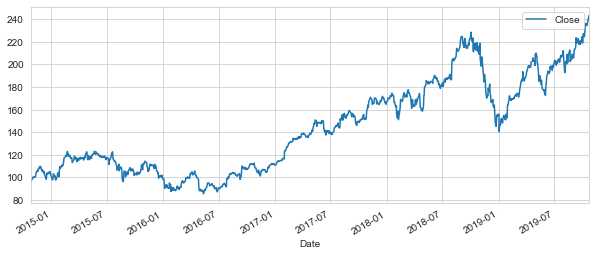

In [90]:
AAPL['Close'].plot(legend=True,figsize=(10,4))

**Erzeuge das gleiche Diagramm für das "Volume" der Aktie (gleichnamige Spalte).**

In [91]:
# Dein Code hier

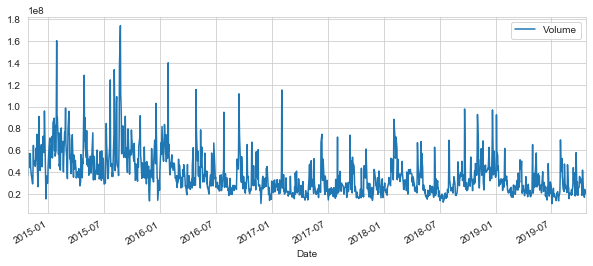

In [92]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Jetzt wo wir die Visualisierung für das Handelsvolumen pro Tag (Volume) und den Schlusspreis gesehen haben können wir damit fortfahren den laufenden Durchschnitt der Aktie berechnen.

Für mehr Informationen zum laufenden Durchschnitt gibt es folgende Quellen:
1. https://de.wikipedia.org/wiki/Gleitender_Mittelwert
2. http://www.investopedia.com/terms/m/movingaverage.asp
3. http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

Glücklicherweise beinhaltet Pandas einen eingebauten Rechner für den laufenden Durchschnitt namens `rolling_mean`. Wir möchten verschiedene laufende Durchschnitte für 10, 20 und 50 Tage berechnen.

**Erstelle eine Liste "ma_day" mit den Elementen 10, 20 und 50.**

In [93]:
ma_day = [10,20,50]

Jetzt können wir jeden laufenden Durchschnitt (en. moving average) "ma" in unserer Liste berechnen. Dazu erstellen wir mit einer for-Schleife für jeden "ma" eine eigene Spalte namens "MA for X days" (wobei wir das X durch die Tage (also "ma") ersetzen wollen. Anschließend können wir diese Spalten mit der `rolling_mean)` Funktion befüllen.

**Berechne die verschiednene laufenden Durchschnitte für AAPL.**

*Hinweis: Schaue für das richtige Format in die Dokumentation von [`rolling().mean()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.Rolling.mean.html).*

In [94]:
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))

    # AAPL[column_name]=pd.rolling_mean(AAPL['Close'],ma)
    AAPL[column_name]=pd.Series(AAPL['Close']).rolling(window=ma).mean()

Jetzt können wir uns diese laufenden Durchschnitte im Vergleich zum Schlusspreis (Spalte: Adj Close) in einer Visualisierung anschauen.

**Erstelle mit Matplotlib eine Visualisierung für den Schlusspreis und die verschiedenen laufenden Durchschnitte.**

In [95]:
# Dein Code hier

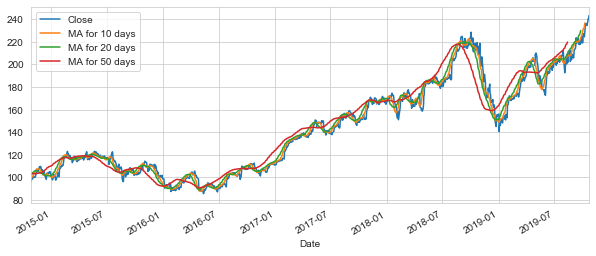

In [96]:
AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

## Analyse der täglichen Rendite

Jetzt wo wir einige grundlegende Analysen abgeschlossen haben können wir fortfahren und etwas mehr ins Detail gehen. Wir werden das Risiko einer Aktie analysieren. Um das zu tun müssen wir uns die tägliche Veränderung der Aktie anschauen. Ihr absoluter Wert alleine genügt uns dazu nicht. Wir können als nächstes Pandas verwenden, um die tägliche Rendite der APPL Aktie zu erhalten. 

**Erstelle eine neue Spalte "daily_returns" im AAPL-DataFrame und trage die tägliche Rendite ein.**

*Hinweis: Die Funktion `pct_change()` kann dir dabei helfen.*

In [97]:
AAPL['Daily Return'] = AAPL['Close'].pct_change()

**Visualisiere diese neue Spalte nun mit Matplotlib.**

In [98]:
# Dein Code hier

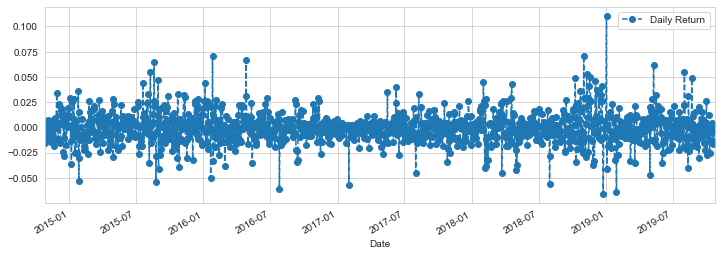

In [99]:
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

Jetzt können wir uns einen allgemeinen Überblick über die tägliche Rendite mit einem Histogramm verschaffen. Das Ziel ist nun ein Histogramm und KDE Plot mit Seaborn in die selbe Arbeitsfläche zu zeichnen.

**Erstelle mit Seaborn ein Hisogramm und ein KDE Plot für die täglichen Renditen in der selben Arbeitsfläche.**

In [100]:
# Dein Code hier

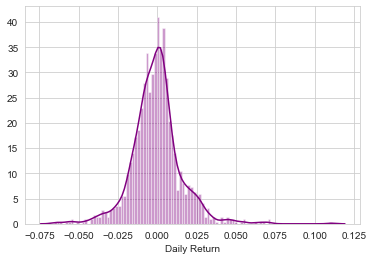

In [101]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

Was wäre, wenn wir die Renditen aller Aktien in unsere Liste analysieren wollten? Fahren wir damit fort ein DataFrame zu erstellen, der alle Schlusspreise (Splate: Adj Close) enthält.

**Erstelle ein DataFrame "closing_df", der die Schlusspreise aller Aktien aus unserer Liste beinhaltet.**

In [102]:
closing_df = web.DataReader(['AAPL','GOOGL','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

**Schaue dir den head dieses neuen DataFrames an.**

In [103]:
closing_df.head()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2018-10-24,211.803284,1057.119995,100.737038,1664.199951
2018-10-25,216.441330,1103.589966,106.624535,1782.170044
2018-10-26,212.994797,1083.750000,105.305260,1642.810059
2018-10-29,208.996857,1034.729980,102.243370,1538.880005
2018-10-30,210.040649,1049.510010,102.125237,1530.420044


Jetzt wo wir alle Schlusspreise beisammen haben können wir uns die täglichen Renditen aller Tech-Aktien anschauen.

**Erstelle einen tech_rets (dt. technologie Renditen) DataFrame, der die täglichen Renditen enthält.**

In [104]:
tech_rets = closing_df.pct_change()

Jetzt können wir die täglichen prozentuellen Renditen von zwei Aktien vergleichen und schauen, wie sie korrelieren. Schauen wir uns zuerst eine Aktie im Vergleich mit sich selbst an.

**Erstelle ein Jointplot mit Seaborn und vergleiche die Renditen von GOOG mit GOOG selbst.**

In [105]:
# Dein Code hier

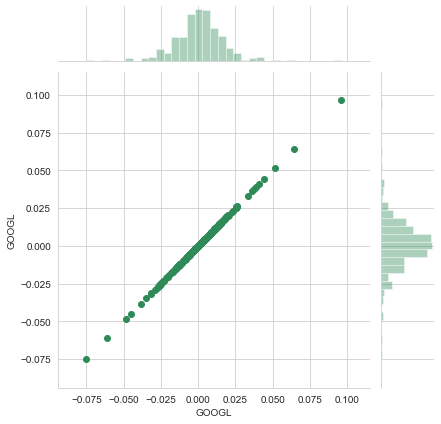

In [106]:
sns.jointplot('GOOGL','GOOGL',tech_rets,kind='scatter',color='seagreen')

Wir sehen hier, dass zwei Aktien, die perfekt (und positiv) miteinander korreliert sind in einer linearen Beziehung ihrer täglichen Renditen stehen. Wir könenn auf die gleiche Art Google und Microsoft vergleichen.

**Erstelle das gleiche Jointplot für GOOG und MSFT.**

In [107]:
# Dein Code hier

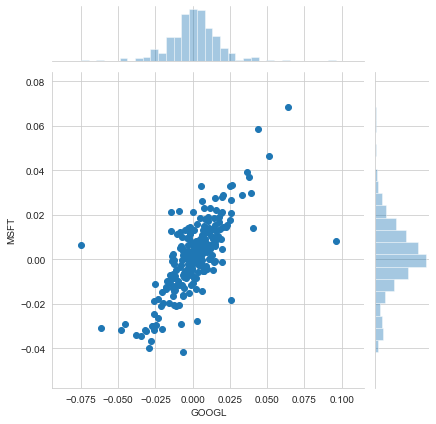

In [108]:
sns.jointplot('GOOGL','MSFT',tech_rets,kind='scatter')

Interessant. Der "pearsonr" Wert (offiziell bekannt als der "Pearson Product-Moment Correlation Coefficient") kann uns einen Hinweis darauf liefern, wie die täglichen prozentualen Renditen korreliert sind. Du findest mehr Informationen unter folgender Adresse:

Pearsonr: 
 - https://de.wikipedia.org/wiki/Korrelationskoeffizient
 - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

Für eine schnelle intuitive Annäherung kann das folgende Bild dienen:

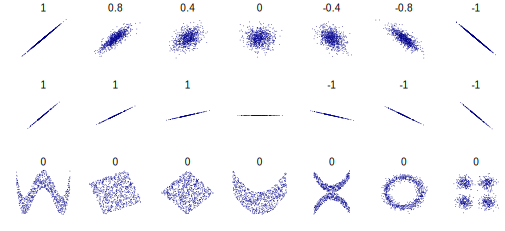

In [109]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn und Pandas machen es uns sehr einfach diesen Vergleich für alle möglichen Kombinationen unserer betrachteten Aktien durchzuführen. Wir können dazu ein Pairplot nutzen.

**Erstelle ein Pairplot mit Seaborn. Betrachtet werden die Technologie-Renditen.**

In [110]:
# Dein Code hier

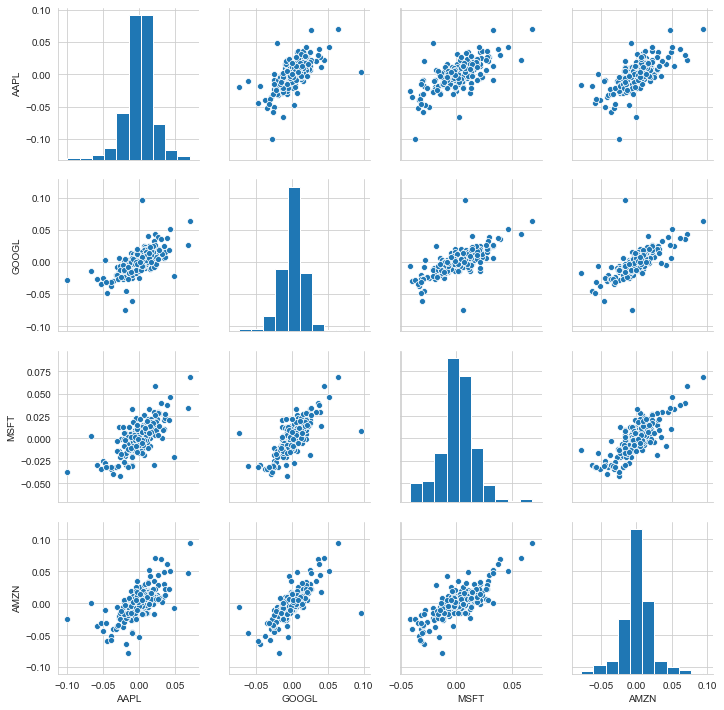

In [111]:
sns.pairplot(tech_rets.dropna())

Oberhalb können wir alle Beziehungen der täglichen Renditen aller betrachteter Aktien sehen. Ein kurzer Blick offenbart eine interessante Korrelation zwischen Google und Amazon. Es könnte interessant sein, diese konkrete Beziehung genauer zu untersuchen. Während `Pairplot` wunderbar einfach ist, können wir `PairGrid` verwenden, um volle Kontrolle über die dargestellten Visualisierungen zu haben. Das schließt ein zu bestimmen, welche Darstellung die Diagonale, die obere "Triangel" und die untere Triangel zeigen.

**Erstelle ein PairGrid und beachte dabei die folgenden Schritte:**
1. Erstelle eine neues Seaborn Diagramm in einem eigenständigen Objekt
2. Nutze `map_upper`, um Scatterplots darzustellen
3. Nutze `map_lower`, um KDE-Plots darzustellen
4. Nutze `map_diag`, um Histogramme darzustellen

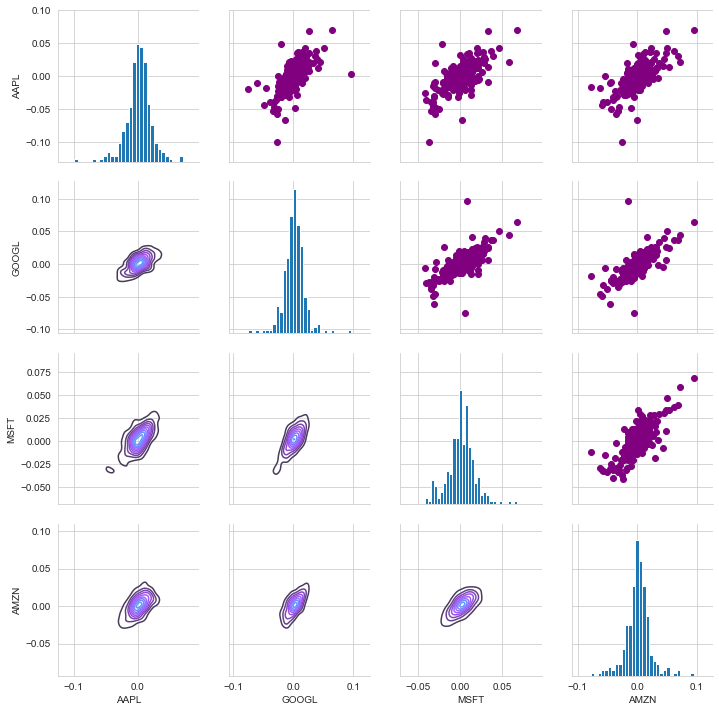

In [112]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

Das gleiche hätten wir auch für die Schlusspreise statt für die Renditen darstellen können.

**Führe die selbe Darstellung erneut durch. Greife dieses Mal auf den "closing_df" DataFrame zu.**

In [113]:
# Dein Code hier

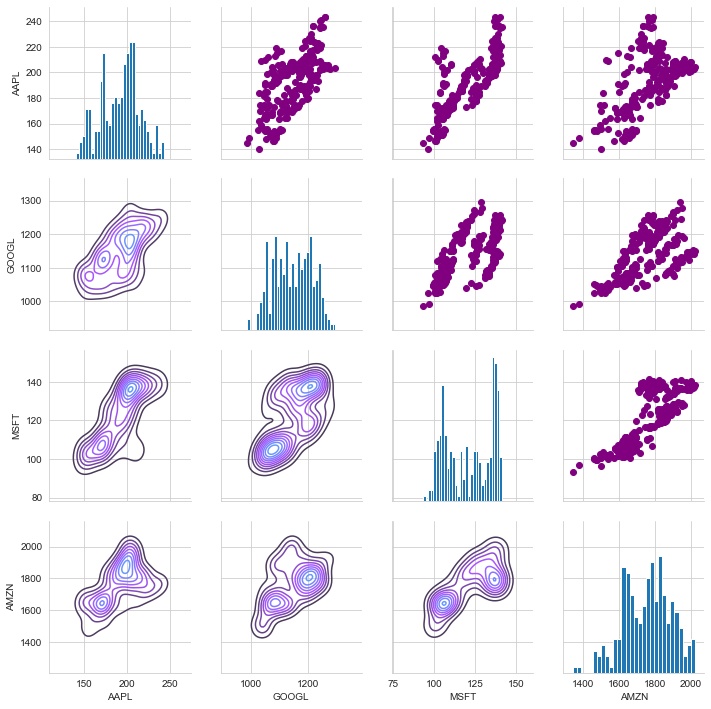

In [114]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

Schließlich können wir auch ein Korrelations-Diagramm (corrplot) erstellen, um numerische Werte für die Korrelation zwischen den täglichen Renditen zu erhalten.

**Berechne die Korrelation für die Tech-Renditen.**

In [115]:
tech_corr = tech_rets.corr()

**Erstelle eine `heatmap` für die Tech-Korrelationen (und schließe die NaN Werte aus).**

In [116]:
# Dein Code hier

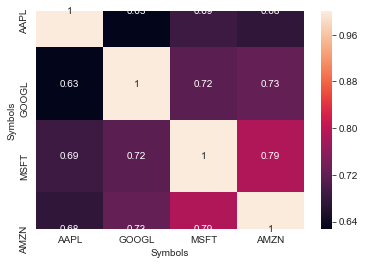

In [117]:
sns.heatmap(tech_corr.dropna(),annot=True)

Fantastisch! Genau wie wir vermutet haben sehen wir hier sowohl visuell als auch numerisch, dass Amazon und Google die stärkste Korrelation haben. Außerdem ist es interessant zu sehen, dass alle Technologie-Aktien positiv korreliert sind.

Toll! Jetzt wo wir die täglichen Renditen analysiert haben können wir einen Schritt weiter gehen und das damit verbunden Risiko genauer betrachten.

## Risiko Analyse

Es gibt viele Möglichkeiten, wie sich Risiko quantifizieren lässt. Eine der grundlegendsten Wege ist es, die Information zu nuten, die wir bereits erzeugt haben: die täglichen Renditen. Diese lassen sich mit der Standardabweichung der täglichen Renditen vergleichen.

**Erstelle zunächst einen neuen DataFrame "rets", das die Daten aus tech_rets ohne die NaN-Werte enthält.**

In [118]:
rets = tech_rets.dropna()

**Erstelle nun ein `Scatterplot` und beachte folgende Schritte:**
1. Definiere eine Fläche "area" mit Pi * 20 (Pi ist in Numpy enthalten)
2. Erstelle ein Scatterplot, dass die durchschnittliche tägliche Rendite mit der Standardabweichung der täglichen Renditen vergleicht.
3. Folgende Parameter sollen enthalten sein: `alpha=0.5` und `s=area`
4. Definiere folgendes Limit für die y-Achse: `[0.01,0.025]`
5. Definiere folgendes Limit für die x-Achse: `[-0.003,0.004]`
6. Die x-Achse soll "Expected returns" (dt. erwartete Rendite) heißen
7. Die y-Achse soll "Risk" (dt. Risiko) heißen
8. Beschrifte die Punkte wie dargestellt

*Hinweis: Schritt 8 ist wirklich anspruchsvoll. Deshalb zwei Tipps. Erstens können dir die [Annotations](http://matplotlib.org/users/annotations_guide.html) helfen. Zweitens verwendest du am besten eine for-Schleife.*

In [119]:
# Dein Code hier

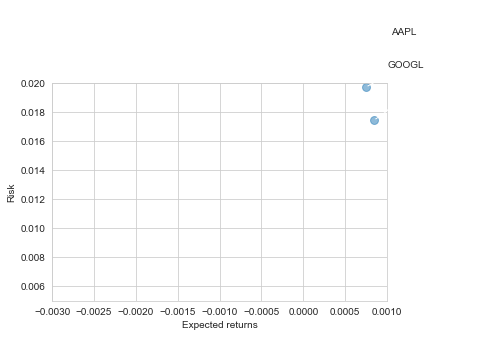

In [120]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

plt.ylim([0.005,0.02])
plt.xlim([-0.003,0.001])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


### Value at Risk

Der Begriff Wert im Risiko oder englisch Value at Risk (VaR) bezeichnet ein Risikomaß für die Risikoposition eines Portfolios im Finanzwesen. Es handelt sich um das Quantil der Verlustfunktion: Der Value at Risk zu einem gegebenen Wahrscheinlichkeitsniveau gibt an, welche Verlusthöhe innerhalb eines gegebenen Zeitraums mit dieser Wahrscheinlichkeit nicht überschritten wird. Dabei betrachten wir ein bestimmtes Konfidenzinterval. Es gibt verschiedene Methoden den Value at Risk zu schätzen. Schauen wir uns eine davon in Aktion an.

#### Value at Risk mit der "Bootstrap" Methode

Mit dieser Methode können wir die empirischen Quantile aus einem Histogram der täglichen Renditen berechnen. Für mehr Infos zu Quantilen schaut hier:
- http://de.wikipedia.org/wiki/Quantil_(Wahrscheinlichkeitstheorie)
- http://en.wikipedia.org/wiki/Quantile

**Erstelle zuerst das Histogramm der AAPL täglichen Renditen (mit `bins=100` und ohne NaN-Werte).**

In [121]:
# Dein Code hier

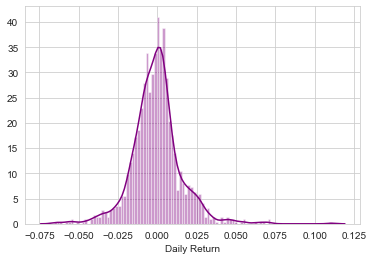

In [122]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

**Verwende `quantile()`, um das 5% (0.05) Quantil für APPL aus "rets" zu berechnen.**

In [123]:
rets['AAPL'].quantile(0.05)

-0.031230743375149306

Das empirische 0.05 Quantil der täglichen Rendite ist -0.018. Das bedeutet, dass mit 95% Konfidenz unser schlimmster täglicher Verlust nicht über 1,8% liegen wird. Wenn wir 1 Million Euro investiert haben, dann ist unser ein-tages 5% VAR 18.000€ (1.000.000€ * 0.018).

Du kannst dies selbstständig für weitere Aktien durchführen, wenn du möchtest.



#### Value at Risk mit der Monte Carlo Methode

Wir werden die Monte Carlo Methode verwenden um viele Versuche mit zufälligen Marktkonditionen laufen zu lassen. Danach berechnen wir die Portfolio Verluste für jeden Versuch. Im Anschluss daran, werden wir die Aggregation von all diesen Simulationen verwenden um festzustellen wie riskant die Aktie ist.

Beginnen wir mit einer kurzen Erklärung von dem was wir machen werden:

Wir werden die [Geometrische Brownsche Bewegung](https://de.wikipedia.org/wiki/Geometrische_brownsche_Bewegung) (GBM), die auch als Markov Prozess bekannt, verwenden. Das bedeutet dass der Aktienkurs einem Zufall folgt und dass er konsistent mit der schwachen Effizienz der [Markteffizienzhypothese](https://de.wikipedia.org/wiki/Markteffizienzhypothese) (engl. efficient market hypothesis), kurz EMH, ist: vergangene Preisinformationen sind schon in den Kursen eingespeisst und die nächsten Kursänderungen sind "konditionell unabhängig" von den vergangenen Küsrsänderungen.

Das bedeutet, aus den Kursverläufen der Vergangenheit kann nicht auf Kurse in Gegenwart und Zukunft geschlossen werden. Wenn diese Variante der Effizienz vorliegt, dürfte man mit Technischer Analyse und Vorhersagen basierend auf die Vergangenheit, keinen Informationsvorsprung mehr erwirtschaften können


Die Gleichung für die Geometrische Brownsche Bewegung ist wie folgt definiert:
    
$$\frac{\Delta A}{A} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$ 

Dabei ist *A* der Aktienkurs, *mu* ist die erwartete Rendite (den wir zuvor schon berechnet haben), *t* ist die Zeit, *sigma* ist die Standardabweichung der Rendite und *epsilon is der Zufallswert.

Wir können beide Seiten mit dem Aktienkurs (*A*) multiplizieren um die Formel nach dem Aktienkurs umzustellen.

$$ \Delta A = A(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 

Jetzt können wir erkennen dass die Änderung des Aktienkurses der aktuelle Aktienkurs multipliziert mit zwei Termen ist. Der erste Term ist bekannt als "drift", was der durchschnittlichen täglichen Rendite multipliziert mit der Zeitdifferenz ist. Der zweite Term ist bekannt als "Schock", für jede Zeitperiode "drifted" der Aktienkurs und erfährt dann einen "Schock" der den Kurs zufällig nach oben oder unten drückt. Wenn wir diese "driften" und "Schock" Schritte tausende male simulieren, dann erhalten wir eine Simulation um mögliche Aktienkurse vorherzusagen.

Für weitere Informationen zur Monte Carlo Methode kannst Du dir die folgenden Links anschauen:
 - http://www.investopedia.com/articles/07/montecarlo.asp
 - https://de.wikipedia.org/wiki/Monte-Carlo-Simulation



Um eine einfache Monte Carlo Analyse zu zeigen werden wir nur mit ein paar Simulationen beginnen. Zuerst definieren wir die Variablen und verwenden das Apple DataFrame APPL:

Setzten wir zunächst unseren Zeithorizont mitder Variable **days** auf 365 Tage:

In [124]:
days = 365

Unser Zeitdelta **dt** ist dann 1 durch die Tage:

In [125]:
dt = 1/days

Jetzt können wir uns **mu** (drift) von dem Datensatz mit der erwarteten Rendite für Apple auslesen:

In [126]:
mu = rets.mean()['AAPL']

Jetzt lesen wir die Kursvolatilität *sigma* von der Standardabweichung std() von der durchschnittlichen Rendite aus:

In [127]:
sigma = rets.std()['AAPL']

Als nächstes erstellen wir eine Funktion und übergeben dieser den *Startpreis* und die *Anzahl der Tage*, der gerade berechneten *sgima* und *mu*. 

In [128]:
def stock_monte_carlo(start_price,days,mu,sigma):
   
    # 1. Definiere einen leeren Array mit den Kursenpreisen "price" und lege den start_preis fest
    price = np.zeros(days)
    price[0] = start_price
    
    # 2. Definiere zwei leere Arrays für "shock" und "drift"
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # 3. Lasse den die Berechnung des Kurspreises für alle Tage durchlaufen 
    for x in range(1,days):
        
        # 4. Berechne den "shock"
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # 5. Berechne den "drift"
        drift[x] = mu * dt
        # 6. Berechung des Kursepreis "price"
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    
    # 7. Gebe den berechneten Kurspreis zurück
    return price

Super! Als nächstes werden wir unsere Monte Carlo Funktion einsetzten.

Dazu suchen wir zunächst den Startkurs von der Apple Aktie mit der head Funktion und übergeben diesen der Variable *start_price*.

In [129]:
AAPL.head(1)

,Open,High,Low,Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,
2019-10-23,242.1,243.24,241.22,243.18,19932545,NaN,NaN,NaN,NaN


In [130]:
start_price = 115.8

Danach rufen wir mit einer for Schleife 100 mal einen plot auf, der jeweils den Kurs aus der unser erstellten Monte Carlo Funktion darstellt.

Text(0.5, 1.0, 'Monte Carlo Analysis for Apple')

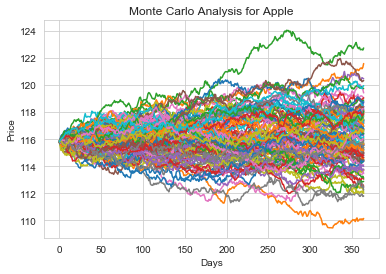

In [131]:
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')

Super! Jetzt werden wir weitermachen und ein Histogram mit den Ergebnissen eines viel größeren Laufs darstellen. 

Wir beginnen die Variable runs mit der Anzahl der Wiederholungen zu definieren. Je nach der Anzahl der Wiederholungen kann das eine Weile dauern.


In [132]:
runs = 10000

Als nächstes erstellen wir wieder eine leere Matrix für die Schlusskurse und nennen diese *simulations*.

In [133]:
simulations = np.zeros(runs)

Setzte als nächstes den Threshold der numpy-Ausgabeoptionen mit set_printoptions auf 5 damit nur 0-5 Punkte eines Arrays angezeigt werden.

In [134]:
np.set_printoptions(threshold=5)

Führe jetzt die Monte Carlo Analyse mit einer for-Schleife der zuvor definierten Runs durch. Dabei bildet der letzte Aktienkurs des Runs den Datenpunkt für das Simulationsergebnis.

In [135]:
for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]


Nachdem wir jetzt unser Array an Simulationsergebnissen haben, können wir das Histogram erstellen. Dazu verwenden wir das Quantil um das Risiko der Aktie zu definieren.

Weitere Informationen zum Quantil gibt es hier:
 - (https://de.wikipedia.org/wiki/Quantil_(Wahrscheinlichkeitstheorie)

Definiere jetzt q als das 1% empirische Quantil mit numpy für die Simulationsergebnisse. Das bedeutet dass 99% der Werte in diesem Bereich liegen sollten.

In [136]:
q = np.percentile(simulations, 1)

Jetzt können wir die Verteilung der Endergebnisse mit einem Histogram anzeigen.

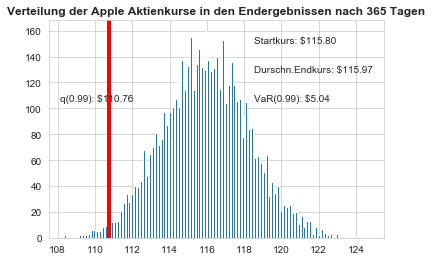

In [137]:
plt.hist(simulations,bins=200)

# Startkurs
plt.figtext(0.6, 0.8, s="Startkurs: $%.2f" %start_price)
# Durschnittlicher Endkurs
plt.figtext(0.6, 0.7, "Durschn.Endkurs: $%.2f" % simulations.mean())

# Varianz des Kurses (innerhalb eines 99% Konfidenz Intervals)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# 1% Quantil
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Linie bei dem 1% Quantils
plt.axvline(x=q, linewidth=4, color='r')

# Überschrift
plt.title(u"Verteilung der Apple Aktienkurse in den Endergebnissen nach %s Tagen" % days, weight='bold');

Genial! Jetzt haben wir uns das 1% empirische Quantil der Aktienkurse in den Endergebnissen angeschaut um den Value at Risk für die Apple Aktie anzuschauen. Dieses scheint bei 3.23 für jedes Investment von 115.80 (der initiale Aktienkurs für die Apple Aktie) zu sein.

Das beudeutet, für jede initiale Apple Aktie die du kaufst, hast du gemäß der Monte Carlo Simulation zu 99% einen Wert von 3.23 einem Risiko ausgesetzt.

Glückwunsch zum beenden des Aktienanalyse Projektes! Hier gibt es ein paar weitere Fragestellungen und Übungen für dich:

1.) Schätze mit beiden Methoden die wir gelernt haben den Value at Risk für eine Aktie die keinen Bezug zur IT hat.

2.) Erstelle dir ein Übungsportfolio mit Aktien und vergleiche deine Risikovorhersagen mit den echten Kursen.

3.) Schaue dir die Korrelationen zweier Aktien genauer an und überprüfe ob dir das weitere Vorhersagen über zukünftige Aktienkurse ermöglicht.

# Gut gemacht!

Hinweis: Die Analysen sind keine Aufforderungen zum Kauf oder Verkauf von Wertpapieren. Für Richtigkeit und Vollständigkeit der Informationen, sowie für Vermögensschäden wird keinerlei Haftung übernommen. 